In [98]:
#import all the necessary libraries to be used

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
#read the csv file into a dataset

testdata = pd.read_csv('energydata_complete.csv')

In [3]:
#show a preview of the dataset

testdata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#numericall description of the dataset

testdata.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
#define the dataset by removing the lights and date column

Testdata=testdata[['Appliances','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']]

In [6]:
#new numerucal description of the new dataset

Testdata.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
#preparing the data to be split into tests

X=Testdata['T2']
y=Testdata['T6']

In [8]:
#transferring into an array

array =np.array([X])

In [9]:
#reshaping the array

X = array.reshape(-1,1)

In [10]:
#splitting into train test slip with random state 42 and 70-30% size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape); print(X_test.shape)

(13814, 1)
(5921, 1)


In [11]:
#defining the linear regression

regression = LinearRegression()

In [12]:
#fitting it

regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#defining the prediction value

pred_val=regression.predict(X_test)

In [14]:
pred_val

array([ 2.15578912, 10.01116055,  1.87391554, ...,  4.24758774,
        8.69822311,  4.9893603 ])

In [15]:
#determining the rsquared value of the model

r2_score = r2_score(y_test, pred_val)


In [16]:
r2_score

0.6427789637197382

In [17]:
regression.score(X,y)

0.6418957425712384

In [18]:
#rounding up to 2 decimal points

round(r2_score, 2)

0.64

In [19]:
#omporting the metrics sublibrary

from sklearn import metrics

In [20]:
#Mean Absolute Error

print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_val))

Mean Absolute Error: 2.822940113131303


In [21]:
#Mean Squared Error

print ('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_val))

Mean Squared Error: 13.17918794078674


In [22]:
#Root Mean Aquared Error

print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_val)))

Root Mean Squared Error: 3.630315129680444


In [23]:
#import thr plt library for graph 

import matplotlib.pyplot as plt

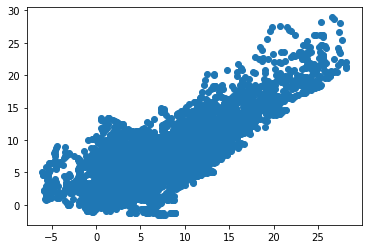

In [24]:
#plotting the scatter diagram of the test moddel and the prediction model

plt.scatter([y_test], [pred_val])

In [25]:
#importing the seaborn library to obtain a better plot

import seaborn as sns

In [26]:
y_test.shape

(5921,)

In [27]:
pred_val=pred_val.flatten()

In [28]:
pred_val.shape

(5921,)

In [29]:
data={'Actual':y_test,'Predict':pred_val}

In [30]:
cp = pd.DataFrame(data)

In [31]:
cp.head()

,Actual,Predict
8980,1.198571,2.155789
2754,2.530000,10.011161
9132,-0.266667,1.873916
14359,11.160000,15.796987
8875,-0.733333,-0.729706


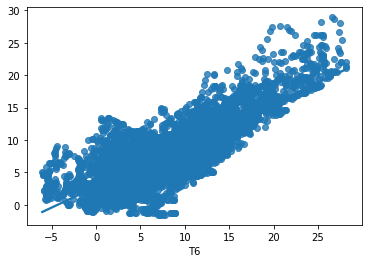

In [32]:
#regression plot for test and prediction

sns.regplot(x='Actual', y='Predict', data=data)

In [33]:
cp1 = cp.head(20)

<function matplotlib.pyplot.show(*args, **kw)>

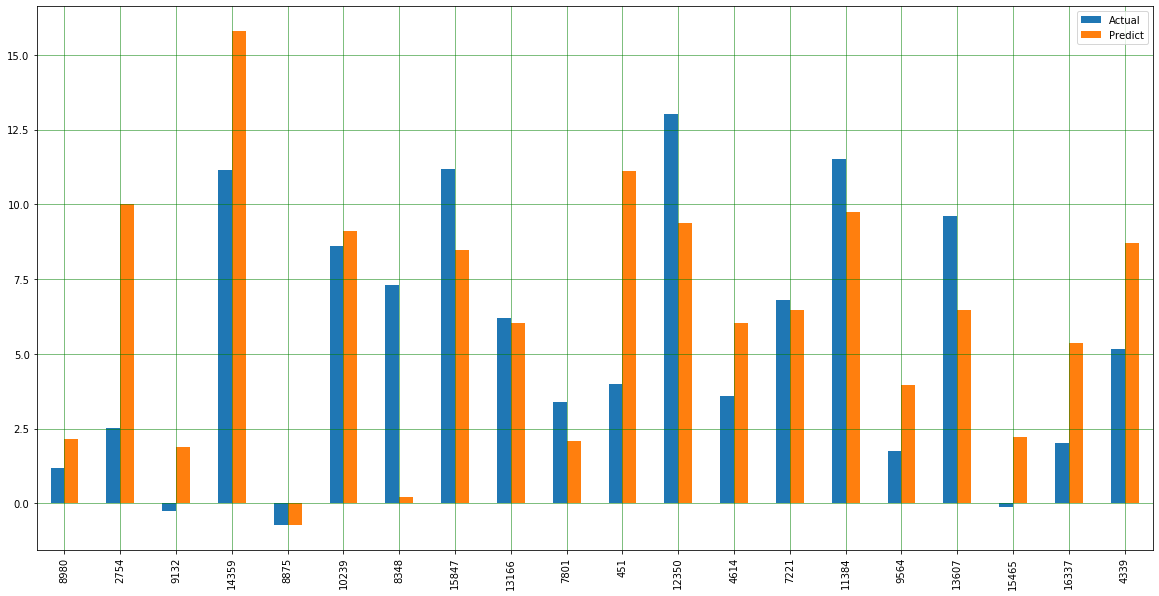

In [34]:
#graph of test to predicted

cp1.plot(kind='bar', figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth= '0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show

In [35]:
#normalizing the dataset 



from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
Testdata = pd.DataFrame(scaler.fit_transform(Testdata))

In [38]:
Testdata

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [39]:
Testdata.columns = ['Appliances','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']

In [40]:
Testdata

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [41]:
features = Testdata.drop(['Appliances'], axis=1)

In [42]:
features.values

array([[0.32734952, 0.56618659, 0.22534529, ..., 0.53846154, 0.26544891,
        0.26544891],
       [0.32734952, 0.54132648, 0.22534529, ..., 0.53393665, 0.37208289,
        0.37208289],
       [0.32734952, 0.53050179, 0.22534529, ..., 0.52941176, 0.57284766,
        0.57284766],
       ...,
       [0.91974657, 0.53866618, 0.69265118, ..., 0.89894419, 0.58397859,
        0.58397859],
       [0.91974657, 0.54949087, 0.67705355, ..., 0.8974359 , 0.12637146,
        0.12637146],
       [0.91974657, 0.53875791, 0.66617051, ..., 0.8959276 , 0.68239057,
        0.68239057]])

In [73]:
import seaborn as sns

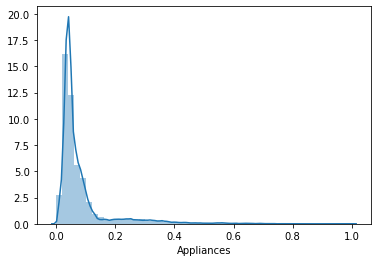

In [74]:
sns.distplot(Testdata['Appliances'])

In [75]:
target=Testdata['Appliances']

In [76]:
X=features

In [77]:
y=target

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [80]:
lm = LinearRegression()


In [81]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
print(lm.intercept_)
print(lm.coef_)

0.1529029588225304
[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [83]:
X_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [84]:
pd.DataFrame(lm.coef_, X_train.columns, columns =["Coefficient"]).sort_values(by = "Coefficient")

,Coefficient
RH_2,-0.456698
T_out,-0.321860
T2,-0.236178
T9,-0.189941
RH_8,-0.157595
RH_out,-0.077671
RH_7,-0.044614
RH_9,-0.039800
T5,-0.015657
T1,-0.003281


In [85]:
prediction = lm.predict(X_test)
prediction

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [86]:
y_test

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances, Length: 5921, dtype: float64

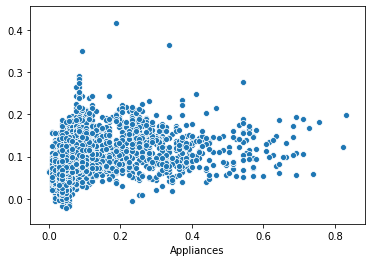

In [87]:
sns.scatterplot(y_test, prediction)

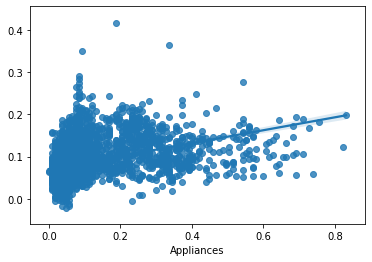

In [88]:
sns.regplot(y_test, prediction)

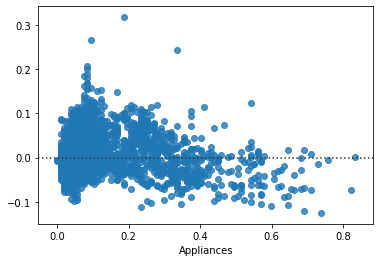

In [89]:
sns.residplot(y_test, prediction)

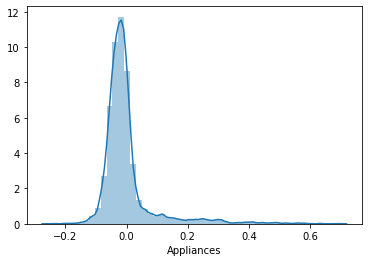

In [91]:
sns.distplot(y_test - prediction)

In [92]:
print ("The MAE is: ", metrics.mean_absolute_error(y_test, prediction).round(2))
print ("The MSE is: ", metrics.mean_squared_error(y_test, prediction))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print ("The R^2 is: ", metrics.r2_score(y_test, prediction))
print ("The RSS is: ", np.sum(np.square(y_test, prediction)))

The MAE is:  0.05
The MSE is:  0.007658778867195367
The RMSE is:  0.0875144494766171
The R^2 is:  0.14890246319303535
The RSS is:  92.98410341514544


In [106]:
#Applying ridge regularization

ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [107]:
ridge_pred = ridge_reg.predict(X_test)

print ("The MAE is: ", metrics.mean_absolute_error(y_test, ridge_pred))
print ("The MSE is: ", metrics.mean_squared_error(y_test, ridge_pred))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print ("The R^2 is: ", metrics.r2_score(y_test, ridge_pred))
print ("The RSS is: ", np.sum(np.square(y_test, ridge_pred)))

The MAE is:  0.05008744584092384
The MSE is:  0.007662176129398588
The RMSE is:  0.08753385704628003
The R^2 is:  0.14852493545092582
The RSS is:  92.98410341514544


In [101]:
lasso_reg = Lasso (alpha = 0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
lasso_pred = lasso_reg.predict(X_test)

print ("The MAE is: ", metrics.mean_absolute_error(y_test, lasso_pred))
print ("The MSE is: ", metrics.mean_squared_error(y_test, lasso_pred))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print ("The R^2 is: ", metrics.r2_score(y_test, lasso_pred))
print ("The RSS is: ", np.sum(np.square(y_test, lasso_pred)))

The MAE is:  0.055256639821262235
The MSE is:  0.008757535449401907
The RMSE is:  0.09358170467245137
The R^2 is:  0.026800880567125818
The RSS is:  92.98410341514544


In [103]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(lm, X_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, X_train, "Ridge_Weight")
lasso_weights_df = get_weights_df(lasso_reg, X_train, "Lasso_Weight")

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on = "Features")


final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000
